Aperçu des données :
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Informations :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Valeurs manqu

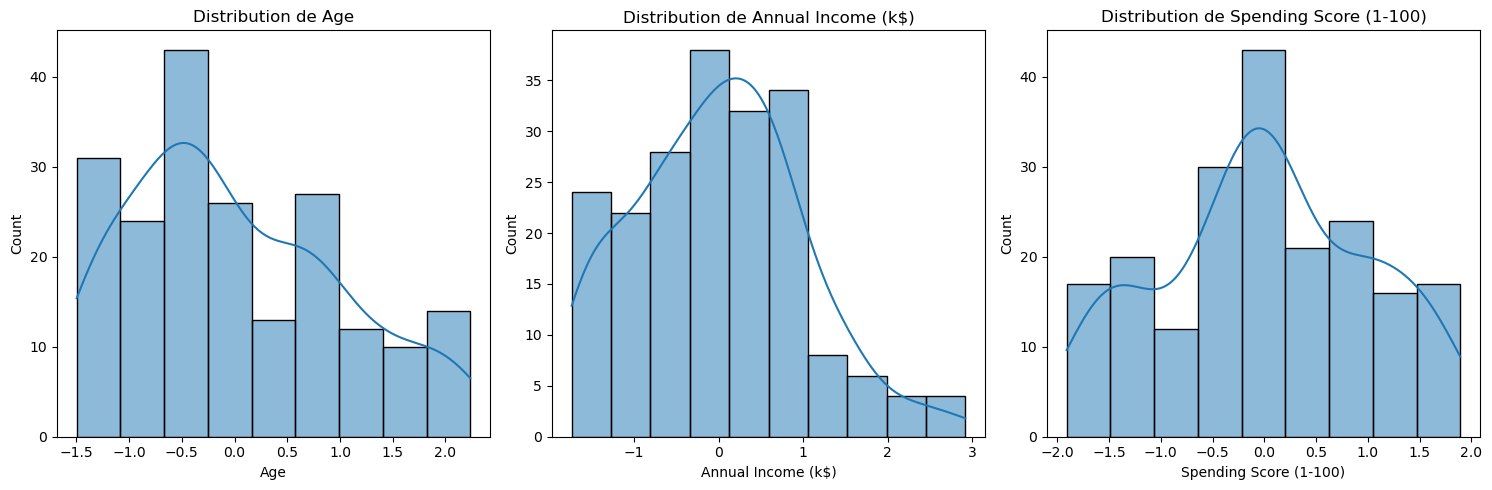

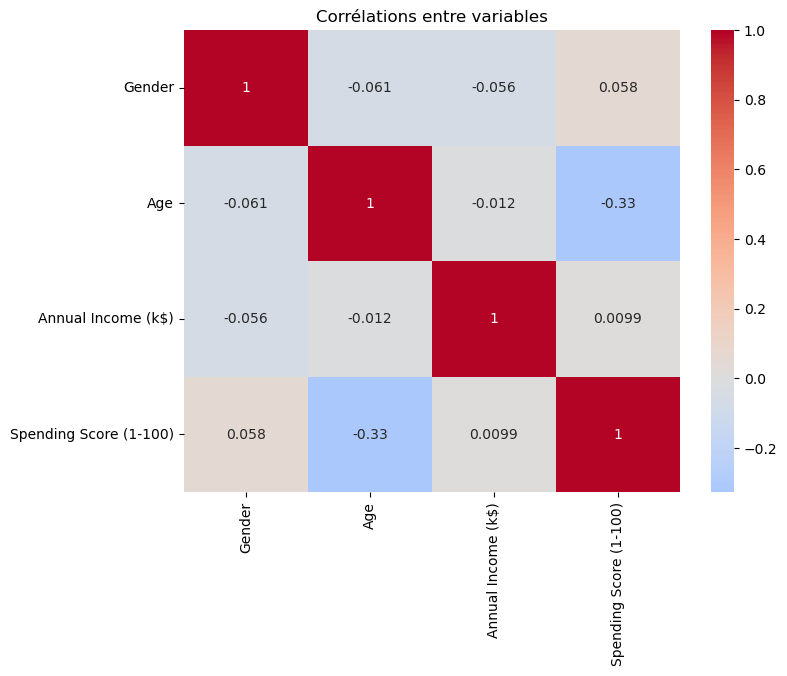

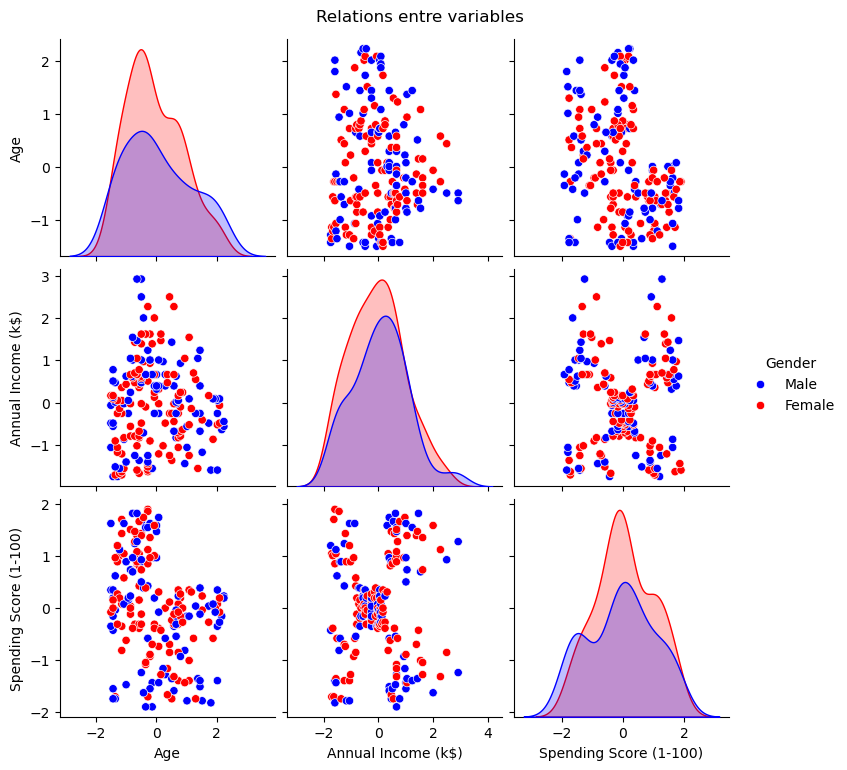

Variance expliquée : [0.4095285 0.3081674]


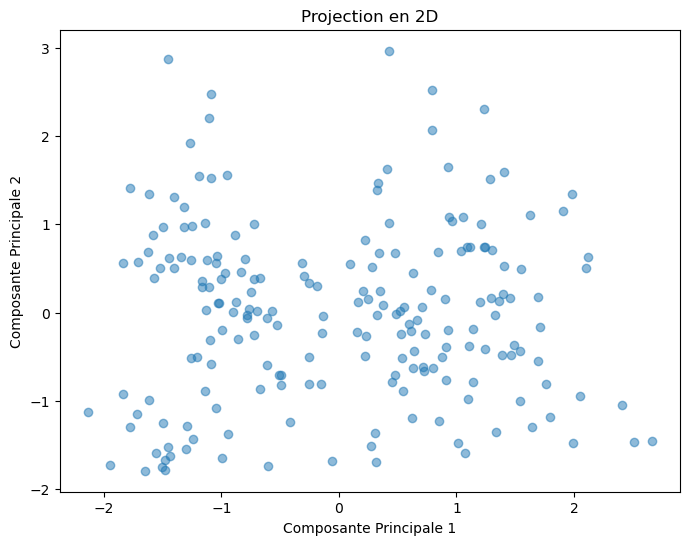

C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with M

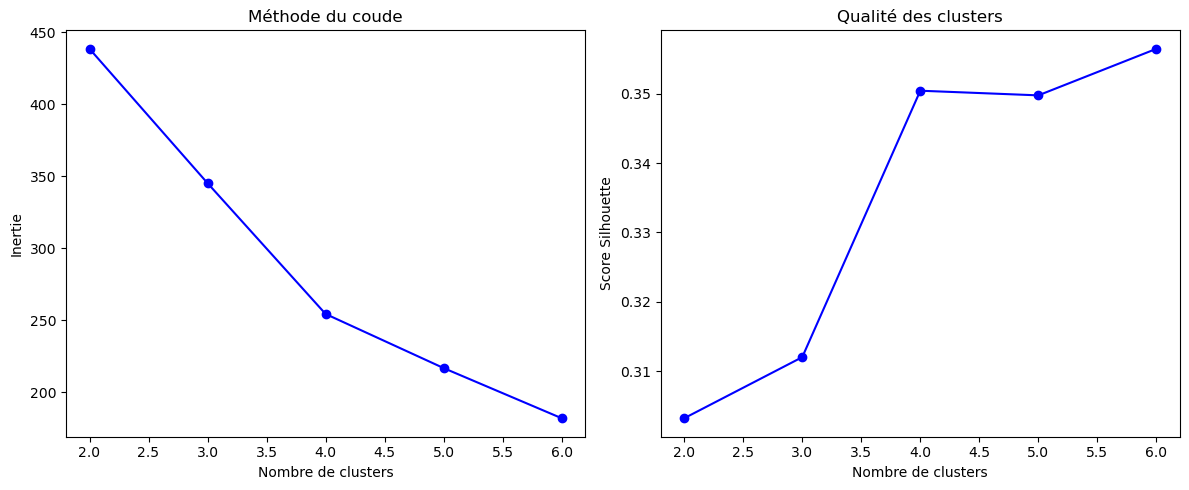

C:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


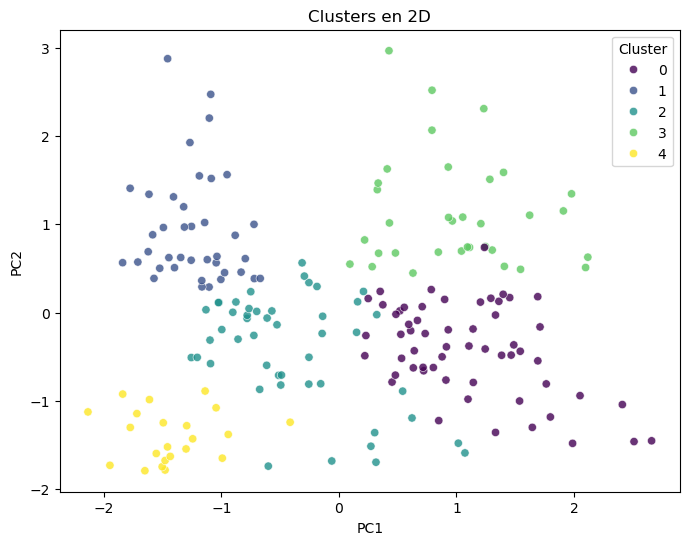


Centroïdes des clusters :
   Cluster  Gender    Age  Annual Income (k$)  Spending Score (1-100)
0        0  Female  55.55               48.48                   41.78
1        1  Female  32.69               86.54                   82.13
2        2  Female  27.96               50.00                   44.64
3        3    Male  41.26               88.50                   16.76
4        4  Female  25.27               25.73                   79.36


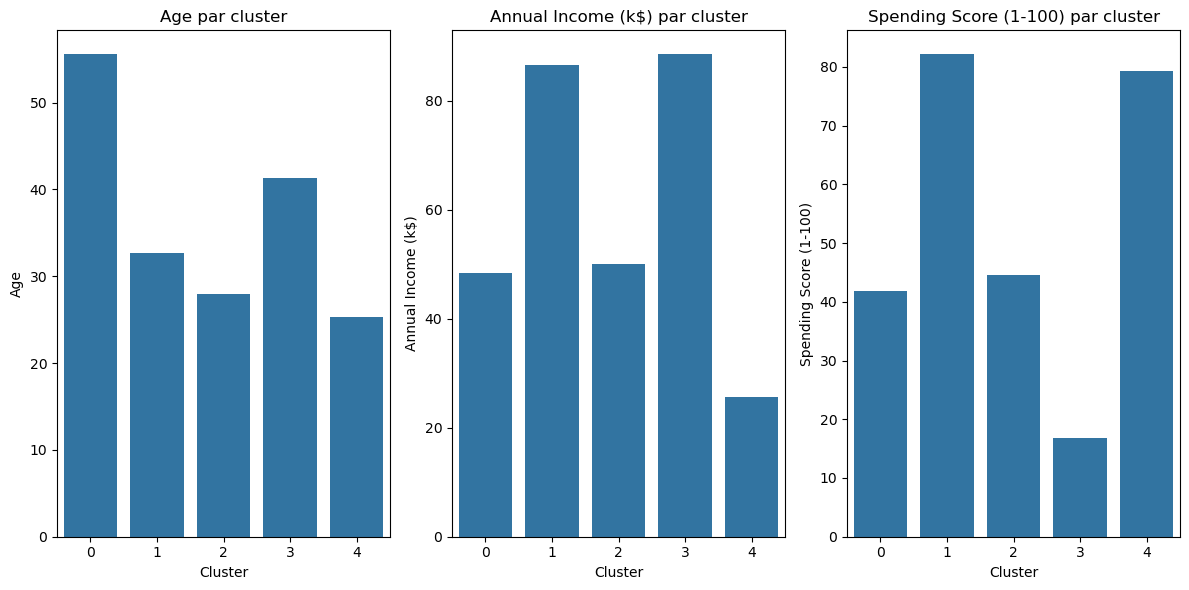


Profils moyens :
   Cluster  Gender        Age  Annual Income (k$)  Spending Score (1-100)
0        0  Female  55.551724           48.482759               41.775862
1        1  Female  32.692308           86.538462               82.128205
2        2  Female  27.957447           50.000000               44.638298
3        3    Male  41.264706           88.500000               16.764706
4        4  Female  25.272727           25.727273               79.363636


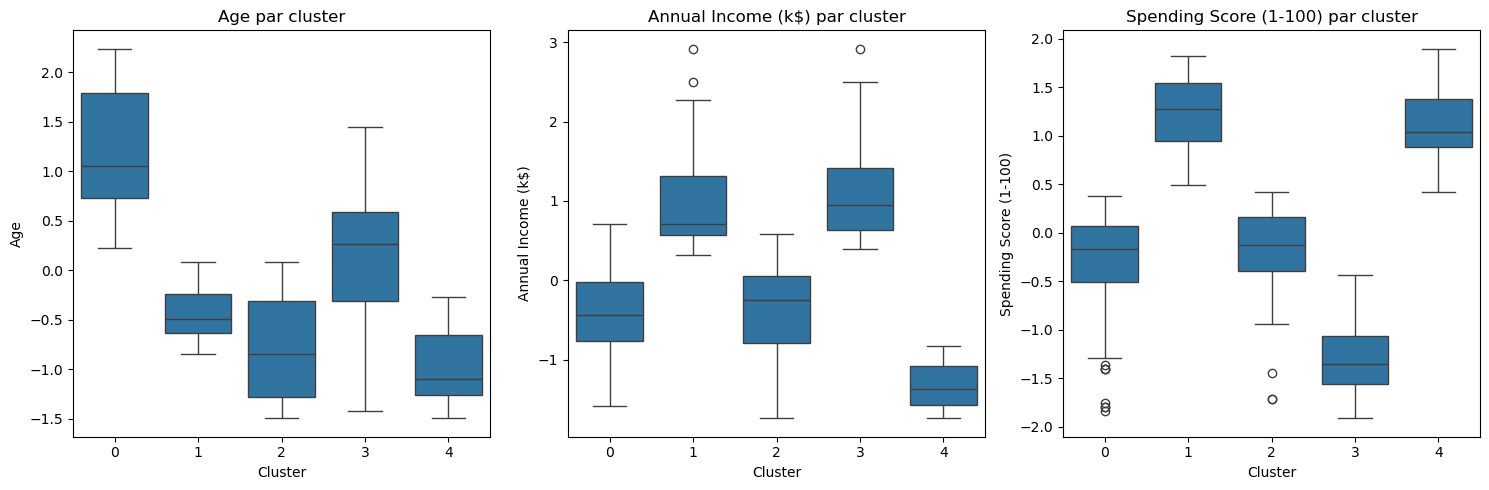


Conclusions:
1. Le clustering a identifié 5 groupes distincts de clients avec des profils différents.
2. Les clusters se distinguent principalement par le revenu annuel et le score de dépense.
3. Par exemple:
   - Cluster 0: Jeunes à revenu moyen avec dépenses élevées
   - Cluster 1: Revenu élevé mais dépenses faibles
   - Cluster 2: Revenu et dépenses moyens
   - Cluster 3: Revenu faible mais dépenses élevées
   - Cluster 4: Revenu élevé et dépenses élevées
4. Suggestions:
   - Adapter les stratégies marketing à chaque segment
   - Approfondir l'analyse avec des données supplémentaires (comportement d'achat)
   - Tester d'autres algorithmes de clustering (DBSCAN, Agglomerative)



In [3]:
# Partie A - Groupement des clients
import os
os.environ["OMP_NUM_THREADS"] = "1"

# 1. Import des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Chargement du fichier (noms originaux conservés)
tableau = pd.read_csv('Mall_Customers.csv')
print("Aperçu des données :")
print(tableau.head())
print("\nInformations :")
print(tableau.info())

# 2. Nettoyage des données

# Vérification des valeurs manquantes
print("\nValeurs manquantes :")
print(tableau.isnull().sum())

# Suppression de la colonne CustomerID
tableau = tableau.drop('CustomerID', axis=1)

# Encodage de Gender (nom original conservé)
tableau['Gender'] = tableau['Gender'].map({'Male': 0, 'Female': 1})

# Normalisation des données
normaliseur = StandardScaler()
colonnes_numeriques = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
tableau[colonnes_numeriques] = normaliseur.fit_transform(tableau[colonnes_numeriques])

print("\nDonnées après traitement :")
print(tableau.head())

# 3. Analyse exploratoire

# Histogrammes
plt.figure(figsize=(15, 5))
for i, col in enumerate(colonnes_numeriques):
    plt.subplot(1, 3, i+1)
    sns.histplot(tableau[col], kde=True)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

# Matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(tableau.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Corrélations entre variables')
plt.show()

# Copie pour visualisation
temp = tableau.copy()
temp['Gender'] = temp['Gender'].map({0: 'Male', 1: 'Female'})

# Graphiques par paires
sns.pairplot(temp, hue='Gender', palette={'Male': 'blue', 'Female': 'red'})
plt.suptitle('Relations entre variables', y=1.02)
plt.show()

# 4. Réduction de dimension
pca = PCA(n_components=2)
resultat_pca = pca.fit_transform(tableau)

# Création du DataFrame pour PCA
pca_df = pd.DataFrame(data=resultat_pca, columns=['PC1', 'PC2'])
print(f"Variance expliquée : {pca.explained_variance_ratio_}")

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection en 2D')
plt.show()

# 5. Clustering K-means

# Détermination du nombre optimal de clusters
inertie = []
silhouette = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tableau)
    inertie.append(kmeans.inertia_)
    silhouette.append(silhouette_score(tableau, kmeans.labels_))

# Graphiques
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertie, 'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette, 'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score Silhouette')
plt.title('Qualité des clusters')
plt.tight_layout()
plt.show()

# Application avec k=5
k_optimal = 5
model_kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = model_kmeans.fit_predict(tableau)

# Ajout des clusters
tableau['Cluster'] = clusters
pca_df['Cluster'] = clusters

# 6. Analyse des clusters

# Visualisation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.8)
plt.title('Clusters en 2D')
plt.show()

# Centroïdes
centroides = model_kmeans.cluster_centers_

# DataFrame des centroïdes
df_centroides = pd.DataFrame(centroides, columns=tableau.columns[:-1])

# Genre majoritaire
df_centroides['Gender'] = df_centroides['Gender'].apply(lambda x: 'Female' if x > 0.5 else 'Male')

# Dénormalisation
df_centroides[colonnes_numeriques] = normaliseur.inverse_transform(df_centroides[colonnes_numeriques])

# Organisation
df_centroides['Cluster'] = range(k_optimal)
df_centroides = df_centroides[['Cluster', 'Gender'] + colonnes_numeriques]

print("\nCentroïdes des clusters :")
print(df_centroides.round(2))

# Visualisation
plt.figure(figsize=(12, 6))
for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x='Cluster', y=col, data=df_centroides)
    plt.title(f'{col} par cluster')
plt.tight_layout()
plt.show()

# Profils des clusters
profils = tableau.groupby('Cluster').agg({
    'Gender': lambda x: 'Female' if x.mean() > 0.5 else 'Male',
    'Age': 'mean',
    'Annual Income (k$)': 'mean', 
    'Spending Score (1-100)': 'mean'
})

# Dénormalisation
profils[colonnes_numeriques] = normaliseur.inverse_transform(profils[colonnes_numeriques])

profils = profils.reset_index()
profils = profils[['Cluster', 'Gender'] + colonnes_numeriques]

print("\nProfils moyens :")
print(profils)

# Boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(colonnes_numeriques):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Cluster', y=col, data=tableau)
    plt.title(f'{col} par cluster')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 8. Conclusions

print("""
Conclusions:
1. Le clustering a identifié 5 groupes distincts de clients avec des profils différents.
2. Les clusters se distinguent principalement par le revenu annuel et le score de dépense.
3. Par exemple:
   - Cluster 0: Jeunes à revenu moyen avec dépenses élevées
   - Cluster 1: Revenu élevé mais dépenses faibles
   - Cluster 2: Revenu et dépenses moyens
   - Cluster 3: Revenu faible mais dépenses élevées
   - Cluster 4: Revenu élevé et dépenses élevées
4. Suggestions:
   - Adapter les stratégies marketing à chaque segment
   - Approfondir l'analyse avec des données supplémentaires (comportement d'achat)
   - Tester d'autres algorithmes de clustering (DBSCAN, Agglomerative)
""")